<a href="https://colab.research.google.com/github/maing-rv/spotify_song_popularity_prediction/blob/main/python_cw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading and viewing the data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [ ]:
# How to load files: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
from google.colab import files
uploaded = files.upload()

In [ ]:
# Data w/ genres:
#spotify_data_w_genres = pd.read_csv('data_w_genres.csv')
#spotify_data_w_genres.head()

In [ ]:
# Data by year:
spotify_data_by_year = pd.read_csv('data_by_year.csv')
spotify_data_by_year.head()

In [ ]:
# Popularity by year, 1920 to 1950:
plt.plot(spotify_data_by_year.year[:31], spotify_data_by_year.popularity[:31])
plt.show()

In [ ]:
plt.plot(spotify_data_by_year.year[31:], spotify_data_by_year.popularity[31:])
plt.show()

In [ ]:
# Popularity by year, 1920 to 2020:
plt.plot(spotify_data_by_year.year, spotify_data_by_year.popularity)
#plt.title("Average popularity from 1920 to 2021")
plt.show()

In [ ]:
sns.lineplot(spotify_data_by_year.year, spotify_data_by_year.popularity)#.set_title('Popularity by Year')

# Data.csv

In [ ]:
data = pd.read_csv('data.csv')
#data.shape

In [ ]:
# Data with popularity:
spotify_data = pd.read_csv('data.csv')

# Overview of the data:
spotify_data.head(10)

In [ ]:
# Statistical description of the data:
spotify_data.describe()

In [ ]:
spotify_data.info()

**Column descriptions:**  
Acousticness - The relative metric of the track being acoustic.  
Danceability - The relative measurement of the track being danceable.  
Duration_ms - The length of the track in milliseconds (ms).  
Energy - The energy of the track.   
Explicit - The binary value whether the track contains explicit content or not.  
Instrumentalness - The relative ratio of the track being instrumental.    
Key - 0-11 - The primary key of the track encoded as integers in between 0 and 11.  
Liveness - The relative duration of the track sounding as a live performance.  
Loudness - Relative loudness of the track in the typical range [-60, 0] in decibel (dB).  
Mode - The binary value representing whether the track starts with a major (1) chord progression or not (0).    
Speechiness - The relative length of the track containing any kind of human voice.  
Tempo - The tempo of the track in Beat Per Minute (BPM).   
Valence -  The positiveness of the track.   
Year - The release year of track.

Popularity - The popularity of the song lately, default country = US.

**Columns to drop:**    
1) artists - The list of artists credited for production of the track.   
2) id - The primary identifier for the track, generated by Spotify.    
3) release_date - The date of release of the track in yyyy-mm-dd, yyyy-mm, or even yyyy format.    
4) name - The title of the track.    




In [ ]:
#spotify_data_20_50 = spotify_data[spotify_data.year <= 1950]
#spotify_data_20_50.shape

In [ ]:
#spotify_data_50_90 = spotify_data[(spotify_data.year > 1950) & (spotify_data.year <= 1990)]
#spotify_data_50_90.shape

In [ ]:
#spotify_data_90_20 = spotify_data[spotify_data.year > 1990]
#spotify_data_90_20.shape

### Preproccessing Dataset


In [ ]:
# Check for null values:
spotify_data.isnull().sum()

In [ ]:
# Check for duplicates - based on all columns:
spotify_data.duplicated().sum()

In [ ]:
# Drop duplicates:
spotify_data = spotify_data.drop_duplicates(keep='first')
spotify_data.duplicated().sum()

In [ ]:
# Check for duplicates - based on name + artists - may have different id:
#spotify_data[spotify_data.duplicated(subset=['name','artists'])]
spotify_data.duplicated(subset=['name','artists']).sum()

In [ ]:
# Drop duplicates:
spotify_data = spotify_data.drop_duplicates(subset=['name','artists'],keep='first')
spotify_data.duplicated(subset=['name','artists']).sum()

In [ ]:
spotify_data.shape

## Popularity distribution

In [ ]:
# Popularity distribution:
sns.histplot(spotify_data['popularity']).set_title('Original popularity distribution')

In [ ]:
# Tracks w/ popularity score of 0:
spotify_data[spotify_data.popularity == 0]

In [ ]:
# Drop tracks w/ popularity == 0:
spotify_data.drop(spotify_data[spotify_data.popularity == 0].index, inplace=True)

In [ ]:
# After:
sns.histplot(spotify_data['popularity']).set_title('Popularity distribution after pre-processing')

In [ ]:
spotify_data['popularity'].describe()

In [ ]:
# Drop 4 irrrelevant columns:
spotify_data = spotify_data.drop(['id', 'artists', 'name', 'release_date'], axis=1)

In [ ]:
print(spotify_data.shape)

# Correlation heat-map

In [ ]:
corr = spotify_data.corr()
corr

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap='BuPu') #BrBG_r
plt.title('Correlation between numerical features')
plt.show()

In [ ]:
series = np.abs(corr['popularity']).sort_values(ascending=False)
print(series)

# Data exploration


This section will be exploring the overall trends found in the dataset, to see how the variables correlate with each other.
There 10 continuous variables and 3 categorial ones - explicit, key, mode.

In [ ]:
# Pair-plot for features:
#sns.pairplot(spotify_data)

## Acousticness

In [ ]:
#plt.hist(spotify_data.acousticness)
#plt.xlabel('acousticness')
#plt.ylabel('count')
#plt.title('Acousticness Distribution')
#plt.show()

In [ ]:
#sns.histplot(spotify_data.acousticness).set_title('Acousticness Distribution')

In [ ]:
# Acousticness vs. popularity:
acousticness_vs_popularity = sns.jointplot(x = 'acousticness', y = 'popularity', data = spotify_data)

#acousticness_vs_popularity.savefig('acousticness_vs_popularity.png')

In [ ]:
#sns.violinplot(x = 'key', y = 'popularity', data = spotify_data)

## Instrumentalness - split into a binary feature

In [ ]:
sns.histplot(spotify_data.instrumentalness).set_title('Instrumentalness Distribution')

In [ ]:
#data[data['instrumentalness']==0]

In [ ]:
#spotify_data['instrumentalness'] = spotify_data['instrumentalness'].replace(0, spotify_data['instrumentalness'].mean())

In [ ]:
# Instrumentalness:
instrumentalness_vs_popularity = sns.jointplot(x = 'instrumentalness', y = 'popularity', data = spotify_data)
#instrumentalness_vs_popularity.savefig('instrumentalness_vs_popularity.png')

In [ ]:
#plt.hist(spotify_data.instrumentalness)
#plt.xlabel('instrumentalness')
#plt.ylabel('count')
#plt.title('Instrumentalness Distribution')
#plt.show()

In [ ]:
# Split into binary feature:
spotify_data['instrumentalness'] = list(map((lambda x: 0 if x <= 0.5 else 1), spotify_data.instrumentalness))

In [ ]:
instrumentalness_distr = sns.countplot(spotify_data.instrumentalness).set_title('Instrumentalness Distribution')
#instrumentalness_distr = instrumentalness_distr.get_figure()
#instrumentalness_distr.savefig('instrumentalness_distr.png')

In [ ]:
#sns.boxplot(x = 'instrumentalness', y = 'popularity', data = spotify_data)
binary_instrumentalness_vs_popularity = sns.boxplot(x = 'instrumentalness', y = 'popularity', data = spotify_data).set_title('Instrumentalness vs. Popularity')
#binary_instrumentalness_vs_popularity = binary_instrumentalness_vs_popularity.get_figure()
#binary_instrumentalness_vs_popularity.savefig('binary_instrumentalness_vs_popularity.png')

## Energy

In [ ]:
# Energy:
energy_vs_popularity = sns.jointplot(x = 'energy', y = 'popularity', data = spotify_data)
#energy_vs_popularity.savefig('energy_vs_popularity.png')

In [ ]:
#plt.hist(spotify_data.energy)
#plt.xlabel('energy')
#plt.ylabel('count')
#plt.title('Energy Distribution')
#plt.show()

In [ ]:
#sns.histplot(spotify_data.energy).set_title('Energy Distribution')

## Loudness - skewed left, negative values, a few marginal outliers

In [ ]:
# Loudness:
loudness_vs_popularity = sns.jointplot(x = 'loudness', y = 'popularity', data = spotify_data)
#loudness_vs_popularity.savefig('loudness_vs_popularity.png')

In [ ]:
#plt.hist(spotify_data.loudness)
#plt.xlabel('loudness')
#plt.ylabel('count')
#plt.title('Loudness Distribution')
#plt.show()

In [ ]:
#sns.histplot(spotify_data.loudness).set_title('Loudness Distribution')

In [ ]:
#spotify_data['loudness_log'] = np.log1p(spotify_data['loudness'])
#sns.distplot(spotify_data.loudness_log)

## Duration - skewed right (log transformed), a few marginal outliers

In [ ]:
# Duration:
duration_ms_vs_popularity = sns.jointplot(x = 'duration_ms', y = 'popularity', data = spotify_data)
#duration_ms_vs_popularity.savefig('duration_ms_vs_popularity.png')

In [ ]:
duration_ms_distr = sns.histplot(spotify_data['duration_ms']).set_title('Duration Distribution')
#duration_ms_distr = duration_ms_distr.get_figure()
#duration_ms_distr.savefig('duration_ms_distr.png')

In [ ]:
# Log transform:
spotify_data['duration_ms_log'] = np.log1p(spotify_data['duration_ms'])

duration_ms_log_distr = sns.histplot(spotify_data['duration_ms_log']).set_title('Log Duration Distribution')
#duration_ms_log_distr = duration_ms_log_distr.get_figure()
#duration_ms_log_distr.savefig('duration_ms_log_distr.png')

In [ ]:
print(spotify_data['duration_ms'].skew(), spotify_data['duration_ms_log'].skew())

## Liveness - skewed right

In [ ]:
# Liveness:
liveness_vs_popularity = sns.jointplot(x = 'liveness', y = 'popularity', data = spotify_data)
#liveness_vs_popularity.savefig('liveness_vs_popularity.png')

In [ ]:
#plt.hist(spotify_data.liveness)
#plt.xlabel('liveness')
#plt.ylabel('count')
#plt.title('Liveness Distribution')
#plt.show()

In [ ]:
sns.histplot(spotify_data.liveness).set_title('Liveness Distribution')

In [ ]:
sqrt_liveness=np.sqrt(spotify_data.liveness)
sns.histplot(sqrt_liveness)

In [ ]:
#spotify_data['liveness_log'] = np.log1p(spotify_data['liveness'])
#sns.distplot(spotify_data.liveness_log)

##Speechiness - missing values (or outliers) at 0 + tracks above 0.66 dropped (audiobooks/podcasts) + log transformed 

In [ ]:
# Speechiness:
speechiness_vs_popularity = sns.jointplot(x = 'speechiness', y = 'popularity', data = spotify_data)
#speechiness_vs_popularity.savefig('speechiness_vs_popularity.png')

In [ ]:
#plt.hist(spotify_data.speechiness)
#plt.xlabel('speechiness')
#plt.ylabel('count')
#plt.title('Speechiness Distribution')
#plt.show()

In [ ]:
# Missing values at 0 replaced with a mean: 
spotify_data['speechiness'] = spotify_data['speechiness'].replace(0, spotify_data['speechiness'].mean())
spotify_data[spotify_data['speechiness'] == 0] # check

In [ ]:
#spotify_data['speechiness'] = list(map((lambda x: 0 if x < 0.66 else 1), spotify_data.speechiness))
#spotify_data[spotify_data.speechiness == 1]

In [ ]:
spotify_data[spotify_data.speechiness > 0.66]

In [ ]:
# Drop tracks w/ speechiness > 0.66 - audiobooks and podcasts:
spotify_data.drop(spotify_data[spotify_data.speechiness > 0.66].index, inplace=True)

#sns.histplot(spotify_data['speechiness']).set_title('Speechiness Distribution')

In [ ]:
trans_speechiness_vs_popularity = sns.jointplot(x = 'speechiness', y = 'popularity', data = spotify_data)
#trans_speechiness_vs_popularity.savefig('trans_speechiness_vs_popularity.png')

In [ ]:
# Speechiness distribution:
speechiness_distr = sns.histplot(spotify_data['speechiness']).set_title('Speechiness Distribution')

#speechiness_distr = speechiness_distr.get_figure()
#speechiness_distr.savefig('speechiness_distr.png')

In [ ]:
#from scipy import stats
#boxcox_speechiness=stats.boxcox(spotify_data.speechiness)[0]
#sns.histplot(boxcox_speechiness)

In [ ]:
# Log transform:
spotify_data['speechiness_log'] = np.log(spotify_data['speechiness'])

trans_speechiness_vs_popularity = sns.jointplot(x = 'speechiness_log', y = 'popularity', data = spotify_data)
#trans_speechiness_vs_popularity.savefig('trans_speechiness_vs_popularity.png')

In [ ]:
speechiness_log_distr = sns.histplot(spotify_data['speechiness_log']).set_title('Log Speechiness Distribution')
#speechiness_log_distr = speechiness_log_distr.get_figure()
#speechiness_log_distr.savefig('speechiness_log_distr.png')

## Tempo - missing values (or outliers) at 0 replaced w/ mean

In [ ]:
# Tempo:
tempo_vs_popularity = sns.jointplot(x = 'tempo', y = 'popularity', data = spotify_data)
#tempo_vs_popularity.savefig('tempo_vs_popularity.png')

In [ ]:
# Missing values at 0 replaced with a mean: 
spotify_data['tempo'] = spotify_data['tempo'].replace(0, spotify_data['tempo'].mean())
spotify_data[spotify_data['tempo'] == 0] # check

In [ ]:
# Tempo:
trans_tempo_vs_popularity = sns.jointplot(x = 'tempo', y = 'popularity', data = spotify_data)
#trans_tempo_vs_popularity.savefig('trans_tempo_vs_popularity.png')

In [ ]:
#sns.histplot(spotify_data['tempo']).set_title('Tempo Distribution')

## Valence - missing values (or outliers) at 0 replaced with mean

In [ ]:
# Valence
valence_vs_popularity = sns.jointplot(x = 'valence', y = 'popularity', data = spotify_data)
#valence_vs_popularity.savefig('valence_vs_popularity.png')

In [ ]:
# Missing values at 0 replaced with a mean:
spotify_data['valence'] = spotify_data['valence'].replace(0, spotify_data['valence'].mean())
spotify_data[spotify_data['valence'] == 0] # check

In [ ]:
# Valence
trans_valence_vs_popularity = sns.jointplot(x = 'valence', y = 'popularity', data = spotify_data)
#trans_valence_vs_popularity.savefig('trans_valence_vs_popularity.png')

In [ ]:
#sns.histplot(spotify_data['valence']).set_title('Valence Distribution')

## Danceability - outliers at 0 replaced with mean


In [ ]:
# Danceability:
danceability_vs_popularity = sns.jointplot(x = 'danceability', y = 'popularity', data = spotify_data)
#danceability_vs_popularity.savefig('danceability_vs_popularity.png')

In [ ]:
# Missing values at 0 replaced with a mean:
spotify_data['danceability'] = spotify_data['danceability'].replace(0, spotify_data['danceability'].mean())
spotify_data[spotify_data['danceability'] == 0] # check

In [ ]:
# Danceability:
trans_danceability_vs_popularity = sns.jointplot(x = 'danceability', y = 'popularity', data = spotify_data)
#trans_danceability_vs_popularity.savefig('trans_danceability_vs_popularity.png')

In [ ]:
#sns.histplot(spotify_data['danceability']).set_title('Danceability Distribution')

## Year

In [ ]:
# Year
year_vs_popularity = sns.jointplot(x = 'year', y = 'popularity', data = spotify_data)
#year_vs_popularity.savefig('year_vs_popularity.png')

In [ ]:
sns.histplot(spotify_data['year']).set_title('Year Distribution')

## Key

In [ ]:
# Key:
#sns.distplot(spotify_data['key']).set_title('Key Distribution')
#plt.hist(spotify_data['key'])
#plt.title('Key Distribution')
#plt.show()

# Key distribution:
key_distr = sns.countplot(spotify_data.key).set_title('Key Distribution')

#key_distr = key_distr.get_figure()
#key_distr.savefig('key_distr.png')

In [ ]:
key_vs_popularity = sns.barplot(x = 'key', y = 'popularity', data = spotify_data).set_title('Popularity Based on Key')
#key_vs_popularity = key_vs_popularity.get_figure()
#key_vs_popularity.savefig('key_vs_popularity.png')

In [ ]:
# Key vs. popularity:
key_vs_popularity = sns.boxplot(x = 'key', y = 'popularity', data = spotify_data).set_title('Popularity Based on Key')

#key_vs_popularity = key_vs_popularity.get_figure()
#key_vs_popularity.savefig('key_vs_popularity.png')

## Mode

In [ ]:
# Mode:
mode_distr = sns.countplot(spotify_data['mode']).set_title('Mode Distribution')
#mode_distr = mode_distr.get_figure()
#mode_distr.savefig('mode_distr.png')

In [ ]:
# Mode vs. popularity:
mode_vs_popularity = sns.barplot(x = 'mode', y = 'popularity', data = spotify_data).set_title('Popularity Based on Mode')


#mode_vs_popularity = mode_vs_popularity.get_figure()
#mode_vs_popularity.savefig('mode_vs_popularity.png')

## Explicit

In [ ]:
# Explicit:
explicit_distr = sns.countplot(spotify_data.explicit).set_title('Explicit Distribution')
#explicit_distr = explicit_distr.get_figure()
#explicit_distr.savefig('explicit_distr.png')

In [ ]:
# Explicit:
explicit_vs_popularity = sns.barplot(x = 'explicit', y = 'popularity', data = spotify_data).set_title('Popularity Based on Explicit Content')
#explicit_vs_popularity = explicit_vs_popularity.get_figure()
#explicit_vs_popularity.savefig('explicit_vs_popularity.png')

In [ ]:
explicit_vs_popularity = sns.boxplot(x = 'explicit', y = 'popularity', data = spotify_data).set_title('Popularity Based on Explicit Content')
#explicit_vs_popularity = explicit_vs_popularity.get_figure()
#explicit_vs_popularity.savefig('explicit_vs_popularity.png')

# Log transformation - heat-map

In [ ]:
corr = spotify_data.corr()
np.abs(corr['popularity']).sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot = True, cmap='BuPu') #BrBG_r
plt.title('Correlation between numerical features')

In [ ]:
# Threshold at 0.80 - drop columns:
spotify_data = spotify_data.drop(['duration_ms', 'speechiness'], axis=1)

In [ ]:
spotify_data.describe()

In [ ]:
spotify_data.shape

In [ ]:
corr = spotify_data.corr()
print('Correlation coefficients: ')
np.abs(corr['popularity']).sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap='BuPu') #BrBG_r
plt.title('Correlation between numerical features')

# Feature extraction


## For Regression:

In [ ]:
# Create features' and target variable:
X_regr = spotify_data.drop(['popularity'],axis=1)
#print(X_regr)
y_regr = spotify_data.popularity
#print(y_regr)

In [ ]:
# Split the data - train and test sets:
from sklearn.model_selection import train_test_split
X_regr_train, X_regr_test, y_regr_train, y_regr_test = train_test_split(X_regr, y_regr, test_size = 0.2, random_state=0)

## For Classification:

In [ ]:
# Popularity threshold for classification:
spotify_data.loc[spotify_data['popularity'] < 50, 'popularity'] = 0 
spotify_data.loc[spotify_data['popularity'] >= 50, 'popularity'] = 1
#spotify_data.loc[spotify_data['popularity'] == 1]

In [ ]:
# Create features' and target variable:
X = spotify_data.drop(['popularity'],axis=1)
#print(X)
y = spotify_data.popularity
#print(y)

In [ ]:
# Split the data - train and test sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# Normalisation

We need to unskew the data, e.g. log transformation, and then normalise it, e.g. MinMaxScaler - before running the feature selection algorithm.   

https://scikit-learn.org/stable/modules/preprocessing.html

In [ ]:
from sklearn.preprocessing import MinMaxScaler

cols = ['loudness', 'tempo', 'year', 'duration_ms_log', 'speechiness_log']

# For classification variables:
scaler = MinMaxScaler()
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

In [ ]:
# For regression variables:
scaler = MinMaxScaler()
X_regr_train[cols] = scaler.fit_transform(X_regr_train[cols])
X_regr_test[cols] = scaler.transform(X_regr_test[cols])

# Feature selection


## K Best Algorithm - feature scoring

In [ ]:
# Import SelectKBest, chi2 / f_classif (score functions for classification), f_regression (score function for regression)
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression

In [ ]:
# Create the object for SelectKBest and fit and transform the classification data:
# k is the number of features you want to select [here we are scoring 'all']:
kbest = SelectKBest(score_func = chi2, k = 'all')
ordered_features = kbest.fit(X_train,y_train)

SelectKBest(k='all', score_func=<function chi2 at 0x7f0e954255f0>)

In [ ]:
# Score df:
df_scores = pd.DataFrame(ordered_features.scores_, columns=['Score'])

In [ ]:
# Feature name df:
df_columns = pd.DataFrame(X_train.columns, columns = ['Feature'])

In [ ]:
# Concatenate two dfs:
feature_rank = pd.concat([df_columns, df_scores],axis=1)

In [ ]:
# Show in descending order:
feature_rank.nlargest(14,'Score')

,Feature,Score
3,explicit,6216.911178
4,instrumentalness,1633.000599
0,acousticness,1609.012423
11,year,1472.067163
2,energy,480.644492
1,danceability,152.316905
13,speechiness_log,121.719812
7,loudness,66.041584
6,liveness,60.665400
8,mode,32.915800


In [ ]:
# Create the object for SelectKBest and fit and transform the regression data:
kbest = SelectKBest(score_func=f_regression, k='all').fit(X_regr_train, y_regr_train)
ordered_features = kbest.fit(X_regr_train, y_regr_train)

In [ ]:
# Score df:
df_scores = pd.DataFrame(ordered_features.scores_, columns=['Score'])

In [ ]:
# Feature name df:
df_columns = pd.DataFrame(X_train.columns, columns = ['Feature_name'])

In [ ]:
# Concatenate two dfs:
feature_rank = pd.concat([df_scores,df_columns],axis=1)

In [ ]:
# Show in descending order:
feature_rank.nlargest(14,'Score')

,Score,Feature_name
11,41800.906206,year
0,15191.761111,acousticness
7,10196.774594,loudness
3,7872.233348,explicit
2,7395.706262,energy
4,5022.943639,instrumentalness
1,4086.417875,danceability
12,1947.940200,duration_ms_log
6,756.053376,liveness
13,523.660224,speechiness_log


## Extra Trees Classifier - feature importance

In [ ]:
# Feature importance with decision trees:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
# Create the model and fit it:
model = ExtraTreesClassifier()
model.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
# Scores:
model.feature_importances_

array([0.08293467, 0.06911861, 0.07397584, 0.0443073 , 0.01751388,
       0.05168853, 0.0658954 , 0.09173477, 0.01342833, 0.0632176 ,
       0.06706581, 0.22614783, 0.06970527, 0.06326615])

In [ ]:
# Create a df with ranked features:
ranked_features = pd.Series(model.feature_importances_, index = X_train.columns)

Text(0.5, 1.0, 'Feature Importance')

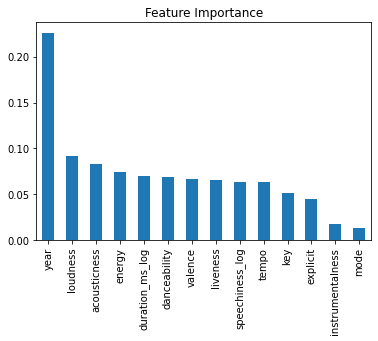

In [ ]:
# Plot in descending order:
ranked_features.nlargest(14).plot(kind='bar').set_title('Feature Importance')

## Mutual Info Classifier - information gain

In [ ]:
# Mutual information:
from sklearn.feature_selection import mutual_info_classif

mu_ifo = mutual_info_classif(X_train,y_train)

In [ ]:
# Create a series with scored features:
mu_data = pd.Series(mu_ifo, index = X_train.columns)

# Show in descending order:
print('Features scored based on information gain: \n')
mu_data.sort_values(ascending=False)

Features scored based on information gain: 



year                0.131163
loudness            0.057841
acousticness        0.034339
duration_ms_log     0.029248
energy              0.028327
explicit            0.028120
tempo               0.025030
danceability        0.015296
instrumentalness    0.013661
speechiness_log     0.008699
mode                0.007271
key                 0.003829
valence             0.002837
liveness            0.000000
dtype: float64

In [ ]:
# Score df:
df_scores = pd.DataFrame(mu_data, columns=['Score'])

# Show in descending order:
df_scores.nlargest(14,'Score')

,Score
year,0.131163
loudness,0.057841
acousticness,0.034339
duration_ms_log,0.029248
energy,0.028327
explicit,0.028120
tempo,0.025030
danceability,0.015296
instrumentalness,0.013661
speechiness_log,0.008699


# Modelling


In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [111]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
#from sklearn.model_selection import GridSearchCV

In [112]:
# Combined function incl. model evaluation:
def classify(model, X, y):
    """ This function takes the model, the input variables and the target variable as parameters. 
    It splits the data, normalises the data, fits the model, scores, 
    cross-validates it and plots a confusion matrix."""
    # Split the data:
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=0)
    # Normalise the data:
    scaler = MinMaxScaler()
    cols = ['loudness', 'duration_ms_log', 'speechiness_log' , 'tempo', 'year'] 
    X_train[cols] = scaler.fit_transform(X_train[cols])
    X_test[cols] = scaler.transform(X_test[cols])
    # Fit and score the model:
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)*100
    print('Accuracy is: ', score)
    # Cross-validation:
    cv_score = cross_val_score(model,X,y,cv=5)
    average_cv_score = np.mean(cv_score)*100
    print('Cross validation Accuracy: ', average_cv_score)
    # Confusion matrix: 
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    return cm
    #sns.heatmap(cm,annot=True).set_title(f'Confusion matrix for {model} model')
    
  
def predict(model, X, y):
    """ This function takes the model, the input variables and the target variable as parameters. 
    It splits the data, normalises the data, fits the model, scores and cross-validates it."""
    # Split the data:
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=0)
    # Normalise the data:
    scaler = MinMaxScaler()
    cols = ['loudness', 'year', 'duration_ms_log', 'speechiness_log' , 'tempo']
    X_train[cols] = scaler.fit_transform(X_train[cols])
    X_test[cols] = scaler.transform(X_test[cols])
    # Fit and score the model:
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)*100
    print('Accuracy is: ', score)
    # Cross-validation:
    cv_score = cross_val_score(model,X,y,cv=5)
    average_cv_score = np.mean(cv_score)*100
    print('Cross validation Accuracy: ', average_cv_score)

# Modelling - Regression:

In [113]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
X_regr_subset = spotify_data.drop(['popularity'],axis=1)
predict(mlr, X_regr_subset, y_regr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

Accuracy is:  25.22163943942668
Cross validation Accuracy:  17.035131073960212


# Modelling - Classification


## Logistic Regression

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Accuracy is:  83.18551061007958


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Cross validation Accuracy:  79.74438200942427


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Text(0.5, 1.0, 'Confusion matrix for Logistic Regression model')

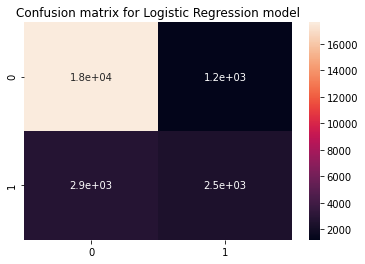

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
cm = classify(lr, X, y)
sns.heatmap(cm,annot=True).set_title(f'Confusion matrix for Logistic Regression model')

## SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', C = 1)
cm = classify(svc, X, y)
sns.heatmap(cm,annot=True).set_title(f'Confusion matrix for SVM model')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Accuracy is:  79.4512599469496
Cross validation Accuracy:  82.56445319220936


## KNN

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Accuracy is:  81.67274535809018
Cross validation Accuracy:  80.35865245953688


Text(0.5, 1.0, 'Confusion matrix for KNN model')

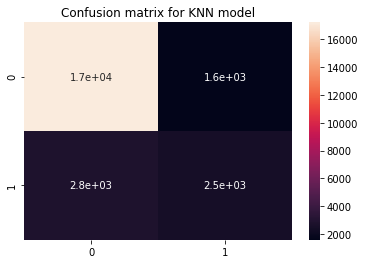

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
cm = classify(knn, X, y)
sns.heatmap(cm,annot=True).set_title(f'Confusion matrix for KNN model')

## Random Forests

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Accuracy is:  85.80072944297082
Cross validation Accuracy:  84.73705647359647


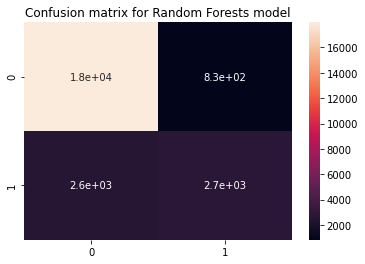

In [121]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
cm = classify(rfc, X, y)
sns.heatmap(cm,annot=True).set_title(f'Confusion matrix for Random Forests model')


plt.show()

In [125]:
#rfc.feature_importances_
ranked_features = pd.Series(rfc.feature_importances_, index = X_train.columns)
ranked_features.nlargest(14)#plot(kind='bar')

year                0.233606
loudness            0.108736
duration_ms_log     0.082044
energy              0.079196
acousticness        0.079135
danceability        0.069442
liveness            0.066386
valence             0.066243
tempo               0.065963
speechiness_log     0.063578
key                 0.033972
explicit            0.029759
instrumentalness    0.013750
mode                0.008191
dtype: float64

Text(0.5, 1.0, 'Feature Importance')

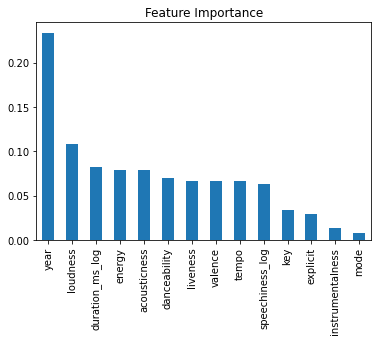

In [126]:
ranked_features.nlargest(14).plot(kind='bar').set_title('Feature Importance')

## XGBoost

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Accuracy is:  83.8071949602122
Cross validation Accuracy:  83.3104964003479


Text(0.5, 1.0, 'Confusion matrix for XGBoost model')

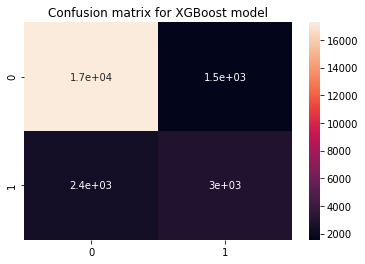

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective = "binary:logistic", n_estimators = 10, seed = 123)
cm = classify(xgb, X, y)
sns.heatmap(cm,annot=True).set_title(f'Confusion matrix for XGBoost model')

# Confusion Matrix


Important to have balanced dataset - popular and not popular.

In [ ]:
#from sklearn.svm import SVC
#clf = SVC(kernel='linear', C = 1)

In [ ]:
#clf.fit(X_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#y_pred = model.predict(X_test)

In [ ]:
#from sklearn.metrics import confusion_matrix

#cm = confusion_matrix(y_test,y_pred)

Text(0.5, 1.0, 'Confusion matrix for SVC model')

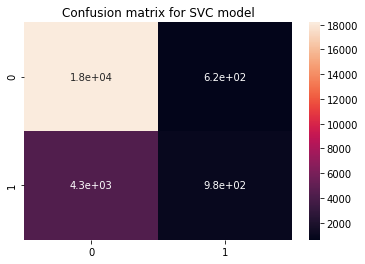

In [ ]:
#sns.heatmap(cm,annot=True).set_title('Confusion matrix for SVC model')

In [116]:
spotify_data.value_counts('popularity')

popularity
0    93880
1    26758
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Popularity Distribution')

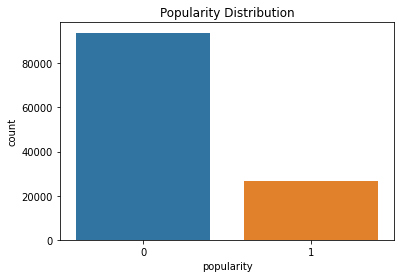

In [117]:
sns.countplot(spotify_data.popularity).set_title('Popularity Distribution')

In [ ]:
#data.drop(data[data.popularity == 0].index, inplace=True)
#data[data['year'] < 1930]

## ROC curve


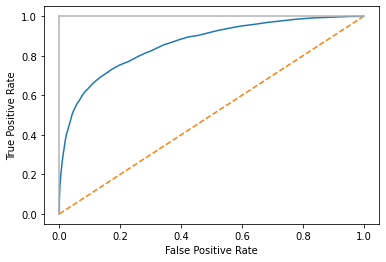

In [124]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = rfc.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,
y_pred_proba)

# Plot ROC curve
#plt.title("ROC curve for Random Forests model")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()